## Similarity to Features
This notebook explores the parameter sensitivity of similarity metrics

In [1]:
import numpy as np
import os
from os.path import isfile, join
from os import listdir
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import csd_functions
import scipy
import reeb_matching
from copy import deepcopy
import scipy.spatial.distance as ssd
import scipy.cluster.hierarchy as hcluster
import paramrw 
import param_analysis
sns.set()

### Reeb Dendrogram Clustering

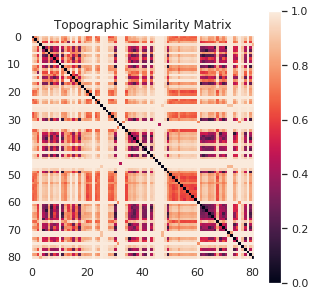

In [2]:
r_similarity_matrix = np.array(pd.read_csv('../data/gbarEvPyrAmpa_sweep/similarity_matrices/similarity_matrix_reeb.csv',header=None))
r_similarity_matrix = 1 - r_similarity_matrix/np.max(r_similarity_matrix)
#Fix precision error so diagonal elements are zero
for idx in range(r_similarity_matrix.shape[0]):
    r_similarity_matrix[idx,idx] = 0


#Make symmetric wrt upper triangle
i_lower = np.tril_indices(r_similarity_matrix.shape[0], -1)
r_similarity_matrix[i_lower] = r_similarity_matrix.T[i_lower]

%matplotlib inline
plt.figure(figsize=(5,5))
sns.set_style('darkgrid',{'axes.grid' : False})
plt.imshow(r_similarity_matrix)
plt.title('Topographic Similarity Matrix')
plt.colorbar()
plt.show()

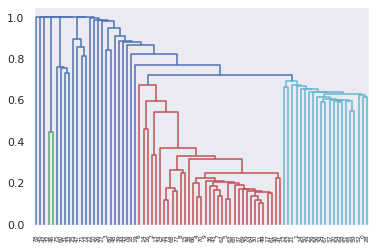

In [3]:
%matplotlib qt

distVec = ssd.squareform(r_similarity_matrix)
linkage = hcluster.linkage(distVec)
plt.figure()
dendro  = hcluster.dendrogram(linkage)

In [4]:
%matplotlib inline
cluster_indeces = hcluster.fcluster(linkage, t=0.99999, criterion='distance')
cluster_labels = np.unique(cluster_indeces)
p_dir = '../lfp_reeb_github/data/gbarEvPyrAmpa_sweep/points'
file_list = np.array(pd.read_csv('../data/gbarEvPyrAmpa_sweep/similarity_matrices/file_list_reeb.txt'))


In [32]:
param_dict, array_keys = param_analysis.make_param_dict('../lfp_reeb_github/template_hnn_github/param/gbarEvPyrAmpa_sweep')
array_keys.remove('sim_prefix')
array_keys.remove('expmt_groups')

# feature_matrix = param_analysis.dict_to_matrix(param_dict)
df = pd.DataFrame()
for key in array_keys:
    df[key] = param_dict[key]

df['cluster'] = cluster_indeces

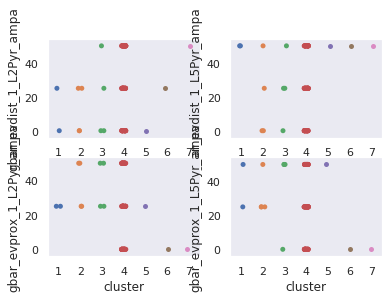

In [43]:
plt.figure()

for count in range(len(array_keys)):
    plt.subplot(2,2,count+1)
    sns.stripplot(x = 'cluster', y = array_keys[count], data = df, jitter = 0.1)

In [5]:
# for label in cluster_labels:
#     file_cluster = file_list[cluster_indeces == label]
#     num_files = len(file_cluster)
#     num_rc = np.ceil(np.sqrt(num_files)).astype(int)

#     count = 1
#     plt.figure()
#     for f in file_cluster:
#         f_path = p_dir + '/' + f + '.csv'

#         plt.subplot(num_rc,num_rc,count)
#         csd_grid = csd_functions.points2grid(np.array(pd.read_csv(f_path)))
#         plt.imshow(csd_grid,aspect='auto')
#         plt.axis('off')
        
#         count += 1
    
#     # plt.subplots_adjust(hspace=0.1, wspace=0.1)
#     plt.subplots_adjust(hspace=0.1, wspace=0.1)
#     plt.show()

### Wasserstein Dendrogram Clustering

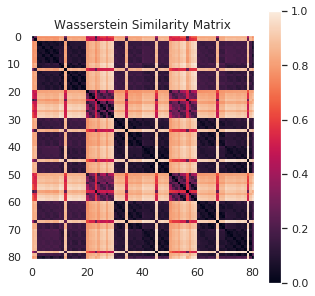

In [6]:
w_similarity_matrix = np.array(pd.read_csv('../data/gbarEvPyrAmpa_sweep/similarity_matrices/similarity_matrix_wasserstein.csv',header=None))
w_similarity_matrix = w_similarity_matrix/np.max(w_similarity_matrix)

#Make symmetric wrt upper triangle
i_lower = np.tril_indices(w_similarity_matrix.shape[0], -1)
w_similarity_matrix[i_lower] = w_similarity_matrix.T[i_lower]

%matplotlib inline
plt.figure(figsize=(5,5))
sns.set_style('darkgrid',{'axes.grid' : False})
plt.imshow(w_similarity_matrix)
plt.title('Wasserstein Similarity Matrix')
plt.colorbar()
plt.show()

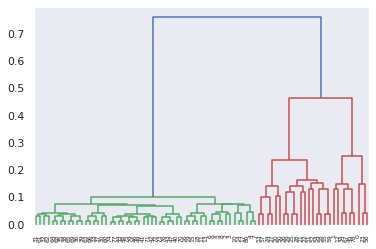

In [7]:
%matplotlib qt

distVec = ssd.squareform(w_similarity_matrix)
linkage = hcluster.linkage(distVec)
plt.figure()
dendro  = hcluster.dendrogram(linkage)

In [8]:
%matplotlib inline
cluster_indeces = hcluster.fcluster(linkage, t=3, criterion='maxclust')
cluster_labels = np.unique(cluster_indeces)
p_dir = '../lfp_reeb_github/data/gbarEvPyrAmpa_sweep/points'
file_list = np.array(os.listdir(p_dir)) 



In [9]:
# for label in cluster_labels:
#     file_cluster = file_list[cluster_indeces == label]
#     num_files = len(file_cluster)
#     num_rc = np.ceil(np.sqrt(num_files)).astype(int)

#     count = 1
#     plt.figure()
#     for f in file_cluster:
#         f_path = p_dir + '/' + f

#         plt.subplot(num_rc,num_rc,count)
#         csd_grid = csd_functions.points2grid(np.array(pd.read_csv(f_path)))
#         plt.imshow(csd_grid,aspect='auto')
#         plt.axis('off')
        
#         count += 1
    
#     # plt.subplots_adjust(hspace=0.1, wspace=0.1)
#     plt.subplots_adjust(hspace=0.1, wspace=0.1)
#     plt.show()